In [1]:
#loading libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading data
data = pd.read_csv(r'C:\Users\OLAMIDE\Desktop\MACHINE_LEARNING_PROJECTS\location_WIFI_Signal_Strength_prediction\wifi_localization.csv',header=None)

In [3]:
data[['Wifi 1','Wifi 2', 'Wifi 3', 'Wifi 4','Wifi 5','Wifi 6','Wifi 7','Room']] = data[0].str.split('\t',7,expand=True)
data = data.drop([0],axis=1)

In [4]:
b = []
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoded = encoder.fit_transform(data['Room'])
b.append(encoded)
new_data = pd.DataFrame(b)
encoded_data = new_data.transpose()
encoded_data
encoded_data.columns = ['encoded_data']
data = data.join(encoded_data['encoded_data'])

In [5]:
features = data.drop(['Room','encoded_data'], axis=1)
target = data['encoded_data']

In [6]:
mapping = {'Room 1':0,'Room 2':1,'Room 3':2,'Room 4':3}
k = {0:'Room 1',1:'Room 2',2:'Room 3',3:'Room 4'}

In [7]:
from sklearn.model_selection import train_test_split
featurestrain, featurestest, targettrain, targettest = train_test_split(features,target,random_state=1)

CLASSIFICATION USING NAIVE BAYES CLASSIFICATION

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(featurestrain, targettrain)
Predicted = model.predict(featurestest)

In [9]:
predicte = model.predict([[-64,-56,-61,-66,-71,-82,-81]])
print("Predicted Value:", k[predicte[0]])

Predicted Value: Room 1


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(targettest, Predicted)

0.982

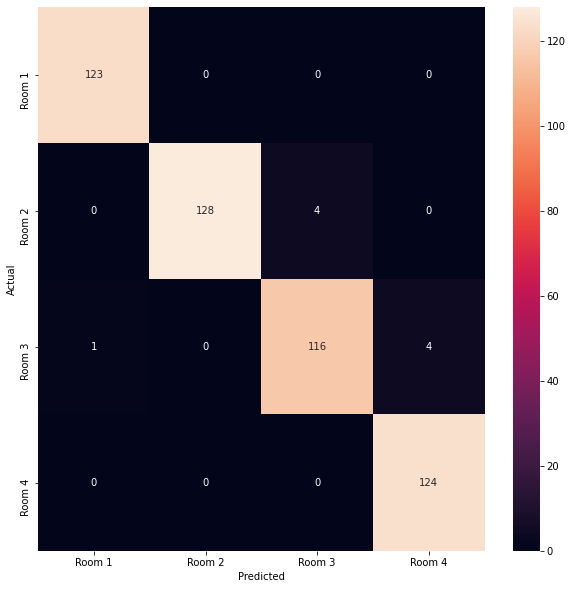

In [11]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(targettest,Predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=mapping,yticklabels=mapping)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

SUPPORT VECTOR MACHINE LINEAR AND RADIAL BASIS CLASSIFICATION

In [12]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', C=10000)
svc_model.fit(featurestrain, targettrain)
svc_Predicted = svc_model.predict(featurestest)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(targettest, svc_Predicted)

0.978

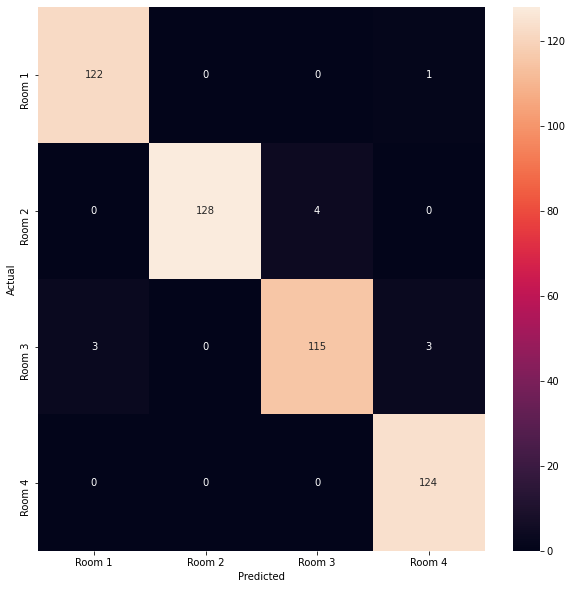

In [14]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(targettest,svc_Predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=mapping, yticklabels=mapping)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [16]:
pca = RandomizedPCA(n_components=7, whiten=True, random_state=42)
svc_r_model = SVC(kernel='rbf', class_weight='balanced')
r_model = make_pipeline(pca, svc_r_model)

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 10, 50],'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(r_model, param_grid)

In [18]:
grid.fit(featurestrain,targettrain)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.005}


In [19]:
best_model = grid.best_estimator_
svc_r_predicted = best_model.predict(featurestest)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(targettest, svc_r_predicted)

0.988

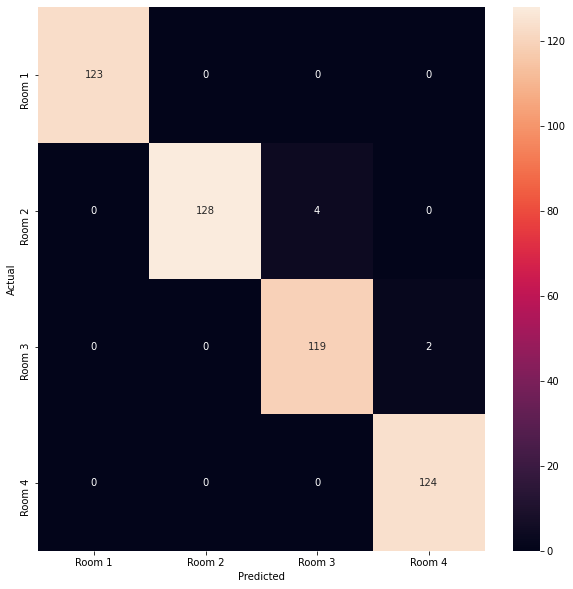

In [21]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(targettest,svc_r_predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=mapping, yticklabels=mapping)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(targettest, svc_r_predicted,target_names=mapping))

              precision    recall  f1-score   support

      Room 1       1.00      1.00      1.00       123
      Room 2       1.00      0.97      0.98       132
      Room 3       0.97      0.98      0.98       121
      Room 4       0.98      1.00      0.99       124

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



RANDOMFOREST CLASSIFICATION

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
forest_model.fit(featurestrain, targettrain)
forest_Predicted = svc_model.predict(featurestest)
forest_Predicted

array([1, 3, 2, 2, 2, 3, 1, 0, 2, 2, 2, 2, 3, 2, 0, 3, 1, 2, 1, 2, 0, 3,
       3, 1, 1, 0, 3, 0, 1, 0, 3, 1, 3, 1, 1, 1, 1, 0, 1, 3, 0, 0, 2, 2,
       2, 3, 1, 3, 3, 3, 3, 2, 1, 0, 1, 1, 1, 1, 3, 0, 3, 0, 2, 2, 2, 1,
       2, 1, 1, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0,
       0, 0, 0, 1, 0, 3, 3, 1, 2, 2, 1, 0, 3, 0, 1, 0, 1, 3, 3, 2, 1, 2,
       1, 0, 2, 3, 0, 1, 1, 2, 3, 2, 2, 2, 3, 2, 1, 2, 3, 2, 3, 1, 2, 1,
       1, 0, 1, 2, 3, 0, 3, 0, 2, 0, 3, 2, 1, 2, 2, 3, 0, 3, 1, 0, 3, 2,
       0, 3, 3, 3, 1, 2, 2, 3, 2, 1, 0, 3, 0, 0, 2, 1, 1, 2, 0, 3, 0, 1,
       1, 1, 1, 2, 1, 3, 1, 3, 0, 3, 2, 2, 0, 1, 0, 3, 2, 3, 0, 0, 0, 0,
       1, 1, 1, 2, 3, 2, 3, 1, 2, 3, 2, 1, 3, 3, 0, 2, 1, 0, 1, 0, 3, 1,
       2, 3, 2, 0, 3, 0, 1, 2, 0, 3, 2, 3, 3, 1, 0, 2, 1, 2, 2, 3, 3, 1,
       1, 3, 0, 0, 2, 1, 3, 3, 0, 0, 2, 3, 3, 2, 2, 3, 1, 0, 2, 3, 0, 3,
       3, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 3, 0, 2, 0, 3, 1, 3, 2, 2,
       3, 0, 2, 2, 2, 0, 3, 1, 3, 0, 1, 1, 2, 0, 0,

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(targettest, forest_Predicted)

0.978

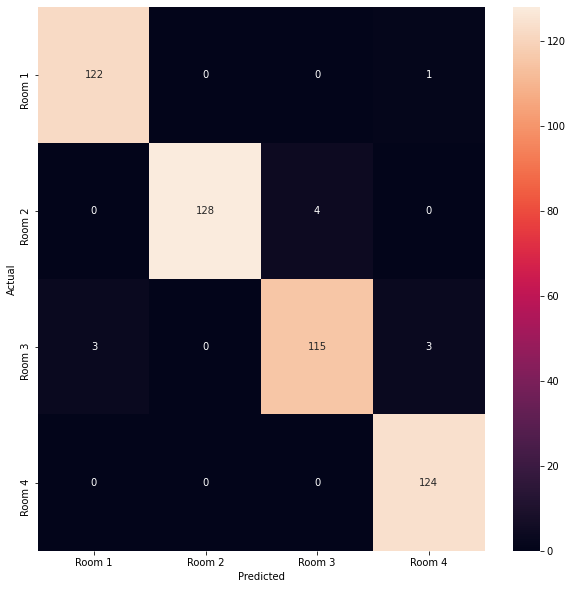

In [26]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(targettest,forest_Predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=mapping, yticklabels=mapping)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()